ex1data1.txt
ex1data2.txt

       0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900 

      0  1
0  2104  3
1  1600  3
2  2400  3
3  1416  2
4  3000  4 

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

           0         1
0  0.131415 -0.226093
1 -0.509641 -0.226093
2  0.507909 -0.226093
3 -0.743677 -1.554392
4  1.271071  1.102205 

theta with Gradient Descent:

340412.65957444796
109447.69824200326
-6578.256626522708

theta using normal equaiton:

340412.65957446804
109447.79646964185
-6578.354854161276

Now, we have calculated the optimal values of theta
The hypothesis function is 2043280050.6028283



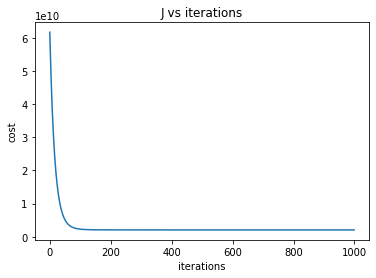

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
files=os.listdir('C:\\Users\\abc\\Desktop\\Ml assignments\\input')
for file in files:
    print (file)
# Read data
data=pd.read_csv('input/ex1data2.txt', header=None)
X=data.iloc[:,0:2] #read first 2 columns from data - 0:2 i.e 0 to 2-1= column 0 and 1
y=data.iloc[:,2]
m=len(y)
print( '\n',data.head(),"\n" ) 
print( X.head(), "\n" )
print( y.head() )

# Featurize X
#np.mean(X)
#print(np.std(X))
X=( X-np.mean(X) )/np.std(X)
#type(X)--> data fram



np.set_printoptions(suppress=True)
print('\n', X.head(), '\n' )

ones=np.ones((m,1),dtype='int64')
#print(ones)
#X=X[:,np.newaxis]# this won't work because newaxis just adds a new dimension...i.e 1D will become 2D, 2D will become 3D# adds a new dimension in the data frame ("NOT ARRAY") in this case, dimension is added in column
#X[0]
X=np.hstack((ones,X))
#print( X.head() )
#print(X)#--now X is an array and not a DataFrame
alpha=0.03
iterations=1000
theta=np.zeros((3,1))
#print(y.shape)
y=y[:,np.newaxis] # because X is a 2D array and y was 1D...so for array substraction...array must be of same size
#print(y.shape)
#print(y)



# calculating theta using G.D
def computeCost(X,y,theta):
    cost=np.dot(X,theta)-y
    return float( sum(pow(cost,2))/(2*m) )
# J=computeCost(X,y,theta)
# print('J with all theta=0 = ',J,'\n')


# a=np.array( [ [1,2,3]] )
# b=np.array( [[4,5,6]] ) 
# print(a,'\n')
# print(b,'\n')
# # print(np.sum(a),'\n')
# # print(np.mean(a),'\n')
# # print(np.std(a))
# # (a-np.mean(a))/np.std(a)
# print ( np.dot(a,b.T) )
# print(a@b.T)
J_history=np.zeros((iterations,1))
def gradientDescent(X,y,theta,alpha,iterations):
    for i in range(iterations):
        temp=(X@theta)-y
        temp=np.dot(temp.T,X) # here @ and .dot both performs matrix multiplication
        theta=theta - (alpha/m)*temp.transpose() # here .T and .transpose both performs transpose of matrix
        J=computeCost(X,y,theta)
        J_history[i]=J
    return theta,J_history
theta,J_history=gradientDescent(X,y,theta,alpha,iterations)
print('theta with Gradient Descent:\n')
for i in range(3):
    print(float(theta[i]))
# J=computeCost(X,y,theta)
# print('\nJ with optimal values of theta = ',J,'\n')  
#print(J_history)

plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('J vs iterations')
plt.plot(J_history)
#plt.show()


# calculating theta with N.E
def normalEquation(X,y):
    theta=np.zeros((X.shape[1],1))
    theta=np.linalg.inv(X.T @ X) @ X.T @ y
    return theta
theta=normalEquation(X,y)
print('\ntheta using normal equaiton:\n')
for i in range(3):
    print(float(theta[i]))
J=computeCost(X,y,theta)
print(f'\nNow, we have calculated the optimal values of theta\nThe hypothesis function is {J}\n')
    